In [1]:
# openCV 활용 이미지 불러오기
import cv2

imgfile = './opencv/data/real.jpg'
img1 = cv2.imread(imgfile)
img2 = cv2.imread(imgfile, 0)

cv2.imshow('color', img1)
cv2.imshow('grayscale', img2)
cv2.waitKey() # 아무키나 누르면 종료
cv2.destroyAllWindows()

In [9]:
# openCV 활용 이미지 저장하기
import cv2
imgfile = './opencv/data/real.jpg'
img1 = cv2.imread(imgfile)
cv2.imwrite('./opencv/data_save/real_20221014.jpg', img1)

True

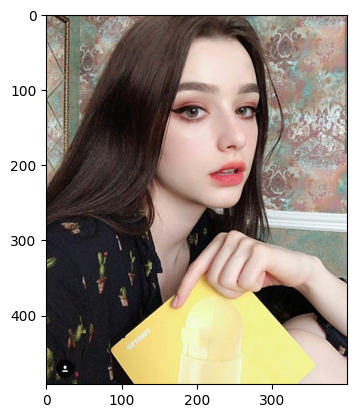

In [14]:
import cv2
from matplotlib import pyplot as plt

# img_file = './opencv/data/real.jpg'
imgBGR = cv2.imread('./opencv/data/real.jpg')
plt.axis('on')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

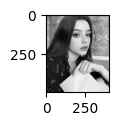

In [2]:
# 이미지 여백 조정과 저장
# 빅데이터 분석(이미지)에서 이미지를 규격화 해야 하는 경우

import cv2
from matplotlib import pyplot as plt

imgfile = './opencv/data/real.jpg'
imgGray = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (1,1))
plt.imshow(imgGray, cmap = 'gray')

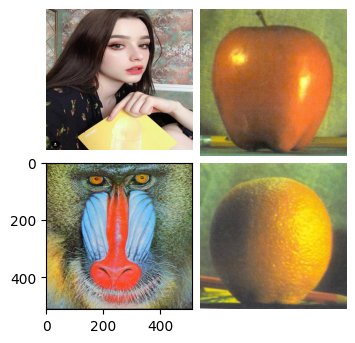

In [17]:
# 다중 이미지 표현
import cv2
from matplotlib import pyplot as plt

path = './opencv/data/'
imgBGR1 = cv2.imread(path+'real.jpg')
imgBGR2 = cv2.imread(path+'apple.jpg')
imgBGR3 = cv2.imread(path+'baboon.jpg')
imgBGR4 = cv2.imread(path+'orange.jpg')

# 컬러 변환: BGR -> RGB
imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

# 이미지 표현을 위한 변수 선언
fig, ax = plt.subplots(2,2, figsize=(3,3), sharey=True)

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].imshow(imgRGB3, aspect = 'auto')

ax[1][1].axis('off')
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.05, hspace=0.05)
plt.savefig('./opencv/data/다중이미지.png', bbox_inches='tight')
plt.show()

In [18]:
# 이미지 크기 변환하기
import cv2
from matplotlib import pyplot as plt

path = './opencv/data/'
img_data = cv2.imread(path+'real.jpg', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.resize(img_data, dsize = (320,240))
dst2 = cv2.resize(img_data, dsize = (0,0), fx=1.3, fy=1.3)

cv2.imshow('Resize', dst1)
cv2.imshow('Enlargement', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

cap = cv2.VideoCapture(1) #일반적으로 0번

while True :
    _, frame = cap.read()
    cv2.imshow('Original', frame)
    
    edges = cv2.Canny(frame, 100,200)
    cv2.imshow('Edges', edges)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27 : # ESC 키
        break

cv2.destroyAllWindows()
cap.release()


In [21]:
import cv2
import numpy as np

detect = cv2.CascadeClassifier('./opencv/haar/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)

while True :
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detect.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces :
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    cv2.imshow('Frame', img)
    k = cv2.waitKey(5) & 0xFF
    if k == 27 : # ESC 키
        break

cap.release()
cv2.destroAllWindows()       

AttributeError: module 'cv2' has no attribute 'destroAllWindows'

In [5]:
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('./opencv/haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haar/haarcascade_eye.xml')

img = cv2.imread('./opencv/data/img002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
cap = cv2.VideoCapture('./opencv/data/interview.mp4')
font = cv2.FONT_HERSHEY_SIMPLEX
face_cascade = cv2.CascadeClassifier('./opencv/haar/haarcascade_frontalface_default.xml')

while True :
    ret, frame = cap.read()
    grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grayframe, 1.8, 2, 0, (30,30))
    
    for (x,y,w,h) in faces :
        cv2.rectangle(frame, (x,y), (x + w, y + h), (255, 0, 0), 3, 4, 0)
        cv2.putText(frame, 'Detected Face', (x - 5, y - 5), font, 0.9, (255, 255, 0), 2)
    
    cv2.imshow('Face', frame)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyWindow('Face')